In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import csv
import os
from PIL import Image

In [4]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

lode list of images with file extension

In [5]:
train_dir = './images/'

In [6]:
filelist = []
for fn in os.listdir(train_dir):
    filelist.append(os.path.splitext(fn)[0])

In [7]:
len(filelist)

5011

load image features

In [8]:
vgg16_feature_list_np = np.load('vgg16_feature.npy')

apply pca to save time. We already compare the performance with and without pca, and find that there is not much difference

In [9]:
X = PCA(n_components=500).fit_transform(vgg16_feature_list_np)

kmeans for clustering

In [10]:
kmeans = KMeans(n_clusters=14, max_iter=1000, tol=1e-7, n_jobs=-1).fit(X)

In [11]:
labels = kmeans.labels_

In [12]:
print("Number of clusters: ", np.unique(labels).size)

Number of clusters:  14


plot some images of each cluster for visualization

In [13]:
path = './images/'
imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]

In [14]:
clusters = defaultdict(list)
k = 0
for i in labels:
    clusters[i].append(imlist[k])
    k += 1

Cluster 1:


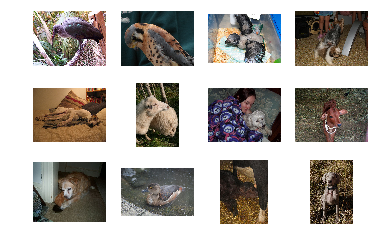

Cluster 2:


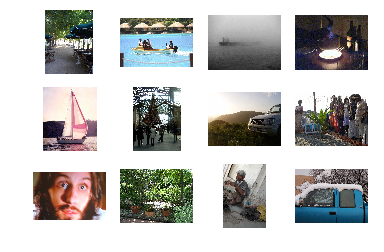

Cluster 3:


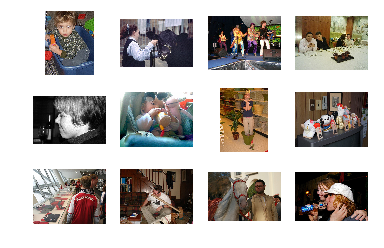

Cluster 4:


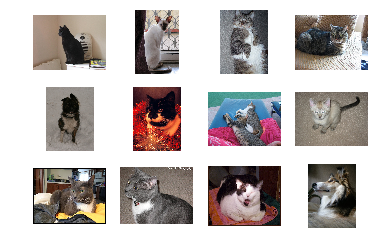

Cluster 5:


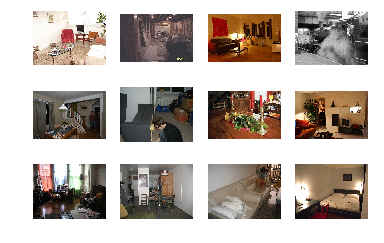

Cluster 6:


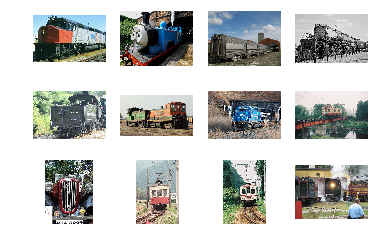

Cluster 7:


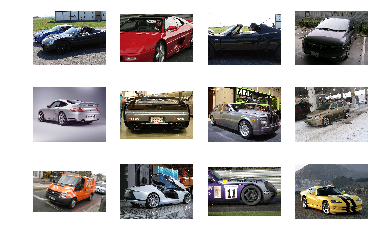

Cluster 8:


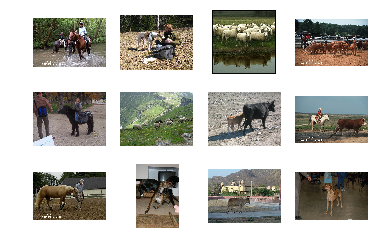

Cluster 9:


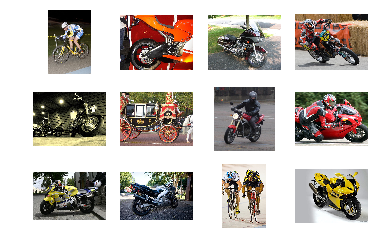

Cluster 10:


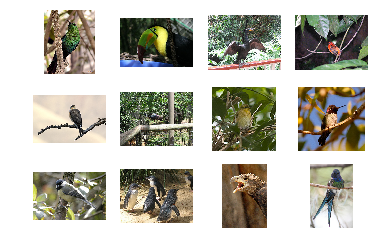

Cluster 11:


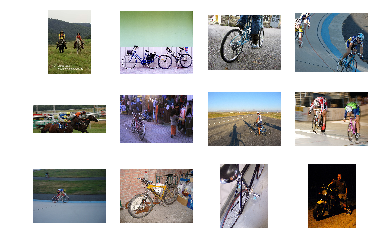

Cluster 12:


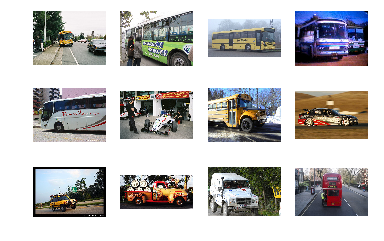

Cluster 13:


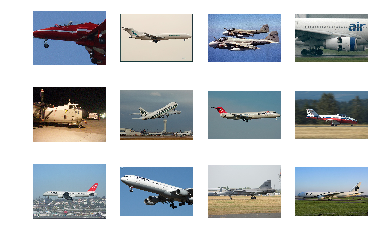

Cluster 14:


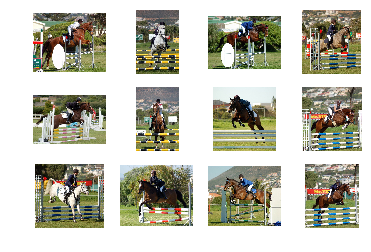

In [15]:
k = 0
for c in clusters:        
        if len(clusters[c])>12:
            print('Cluster {}:'.format(k+1))
            plt.figure()
            for i in range(12):
#                 print(clusters[c][i])
                plt.subplot(3, 4, i + 1)
                img = Image.open(clusters[c][i])
                imgplot = plt.imshow(img)
                plt.axis('off')
            plt.show()
        k += 1

plot elbow

In [16]:
# k means determine k
distortions = []
K = range(1,25)
for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k, n_jobs=-1).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


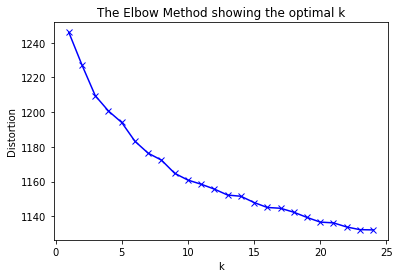

In [17]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

silhouette score

In [18]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [19]:
silhouette_avg = []
for n_clusters in range_n_clusters:
    print("n_clusters:", n_clusters)
    clusterer = KMeans(n_clusters=n_clusters, n_jobs=-1)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))

n_clusters: 2
n_clusters: 3
n_clusters: 4
n_clusters: 5
n_clusters: 6
n_clusters: 7
n_clusters: 8
n_clusters: 9
n_clusters: 10
n_clusters: 11
n_clusters: 12
n_clusters: 13
n_clusters: 14
n_clusters: 15
n_clusters: 16
n_clusters: 17
n_clusters: 18
n_clusters: 19
n_clusters: 20


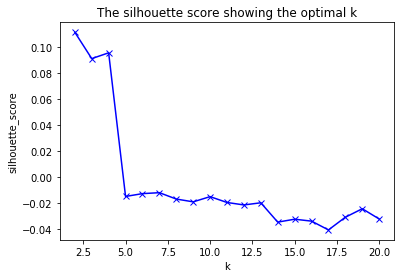

In [20]:
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('The silhouette score showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.111695446
For n_clusters = 3 The average silhouette_score is : 0.09096626
For n_clusters = 4 The average silhouette_score is : 0.09191121
For n_clusters = 5 The average silhouette_score is : -0.015085116
For n_clusters = 6 The average silhouette_score is : -0.02370523
For n_clusters = 7 The average silhouette_score is : -0.011284508
For n_clusters = 8 The average silhouette_score is : -0.019676205
For n_clusters = 9 The average silhouette_score is : -0.014526724
For n_clusters = 10 The average silhouette_score is : -0.022184016
For n_clusters = 11 The average silhouette_score is : -0.02087895
For n_clusters = 12 The average silhouette_score is : -0.028222155
For n_clusters = 13 The average silhouette_score is : -0.019298112
For n_clusters = 14 The average silhouette_score is : -0.0319404
For n_clusters = 15 The average silhouette_score is : -0.038285427
For n_clusters = 16 The average silhouette_score is : -0.05024932
For n_cluster

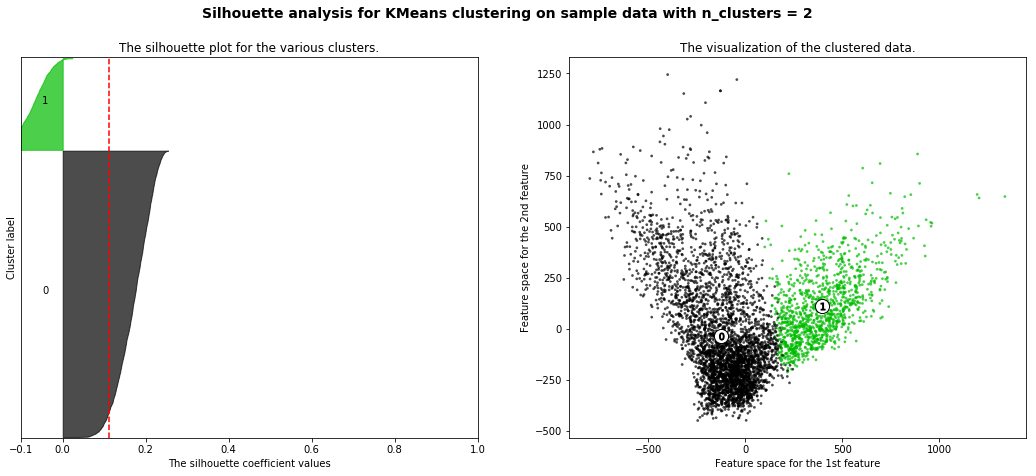

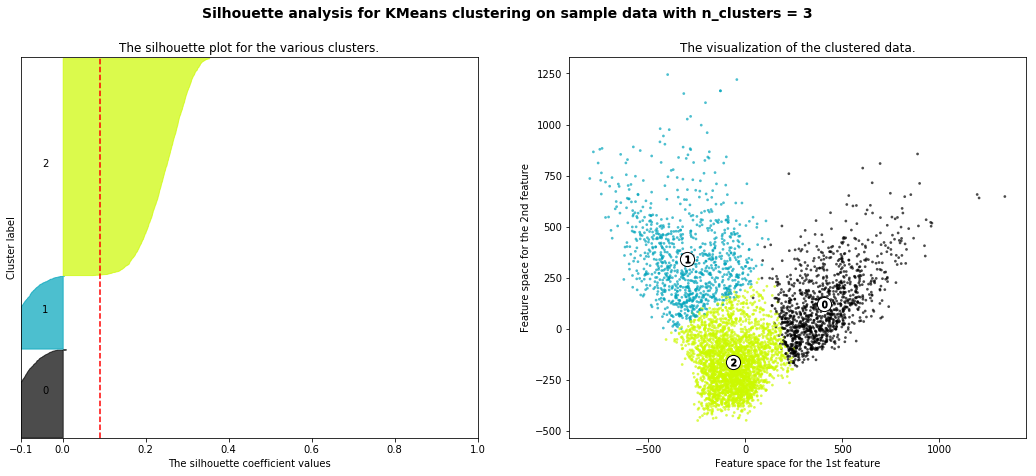

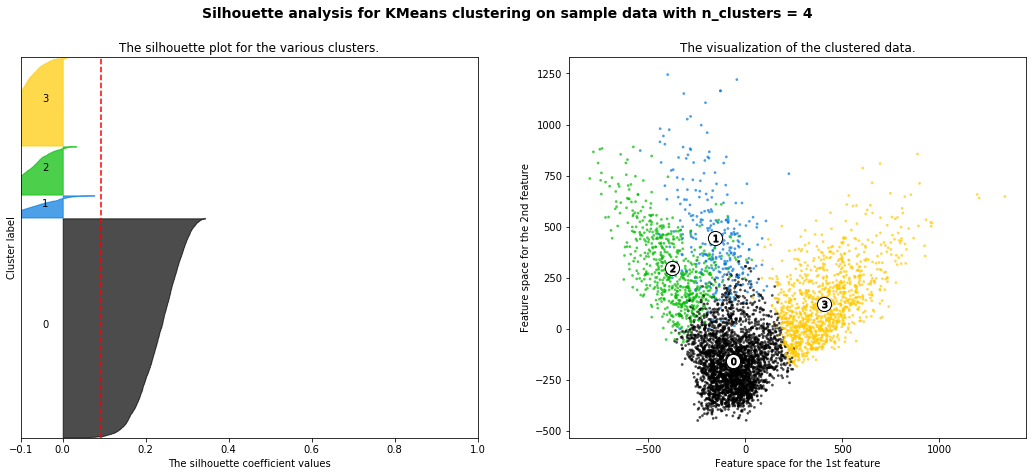

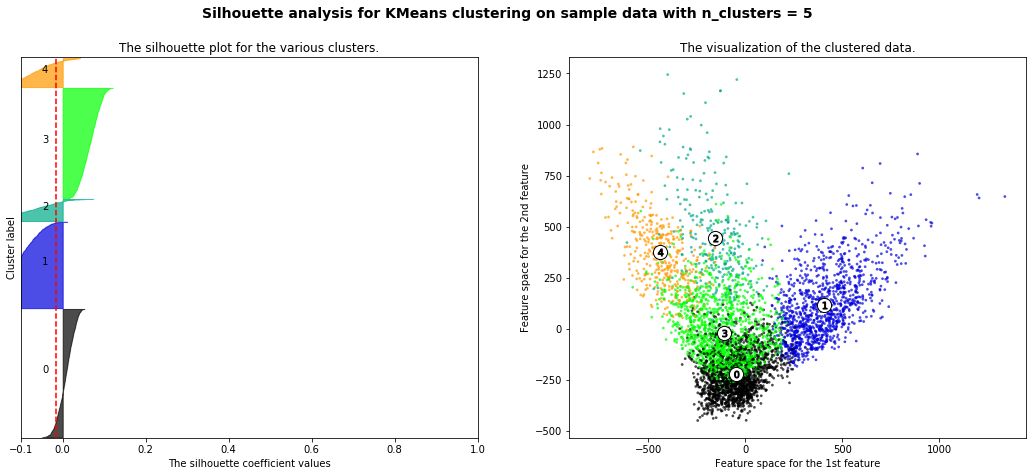

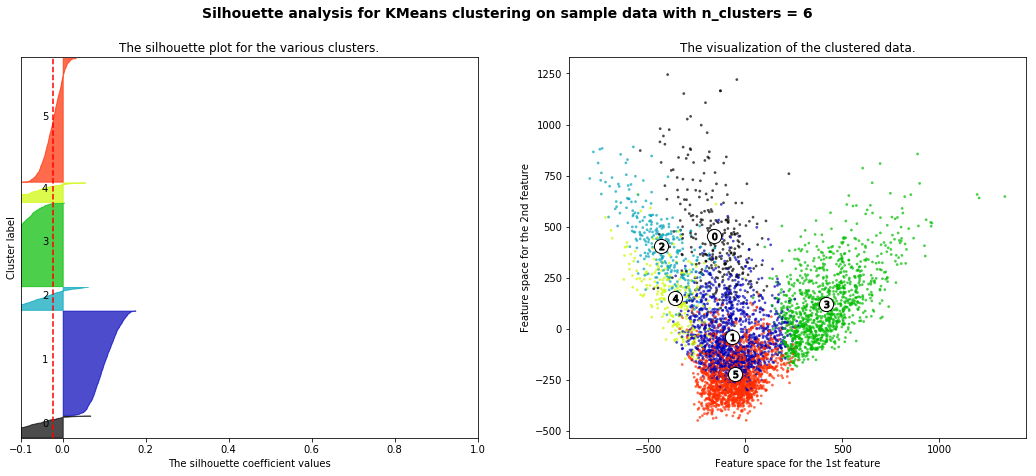

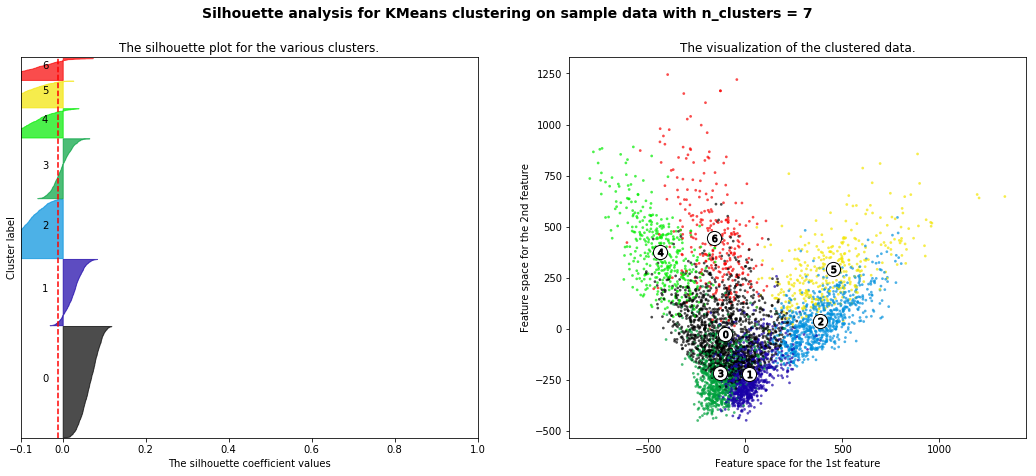

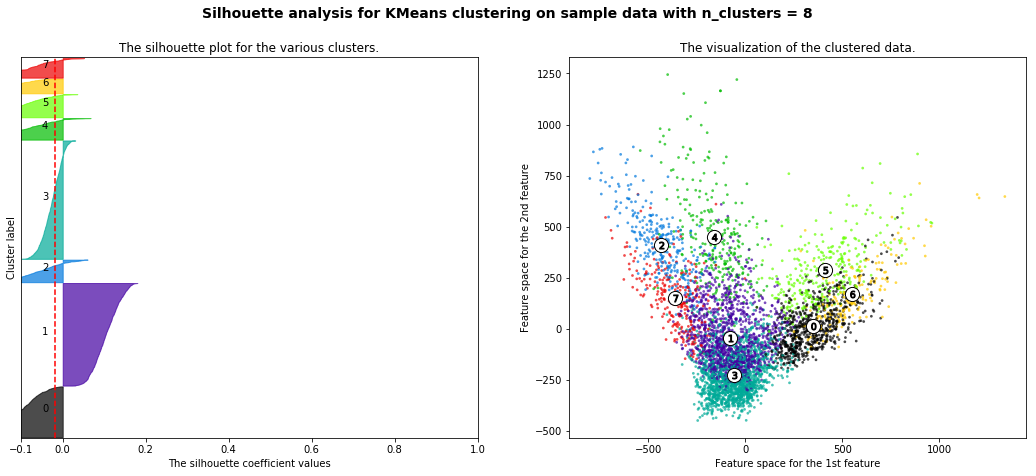

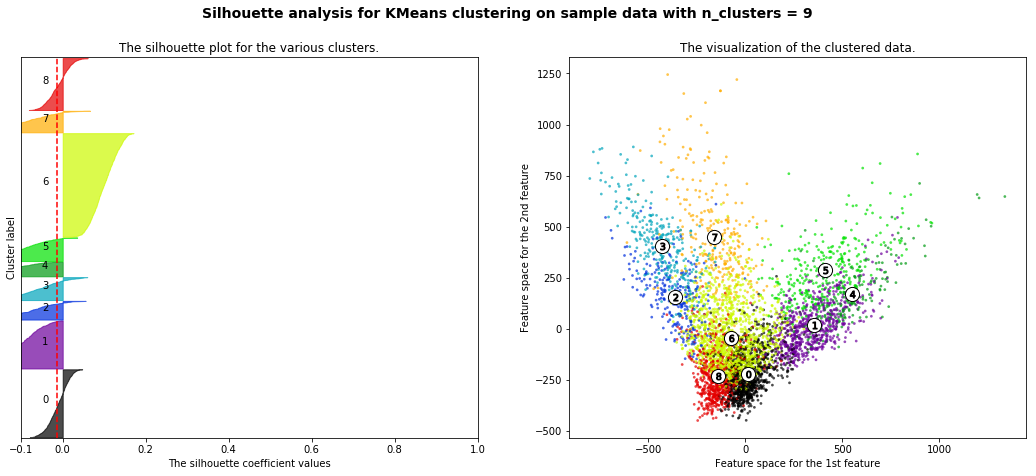

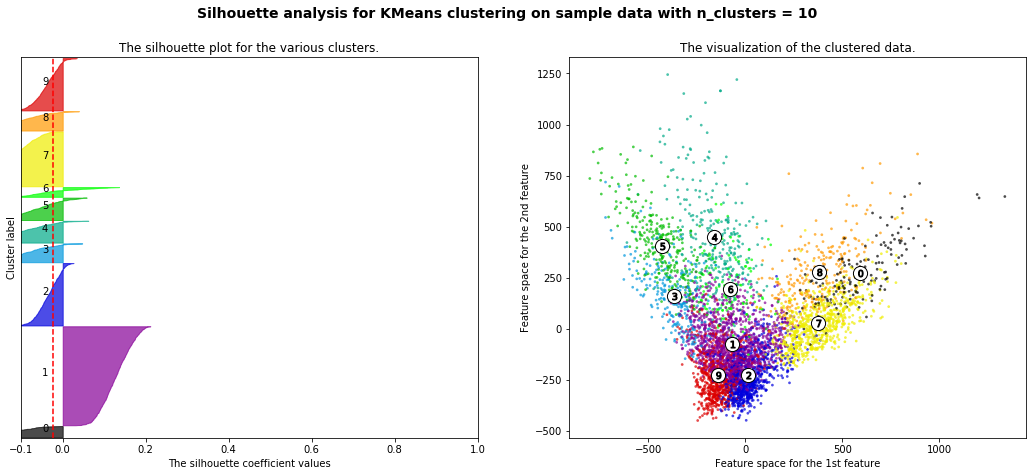

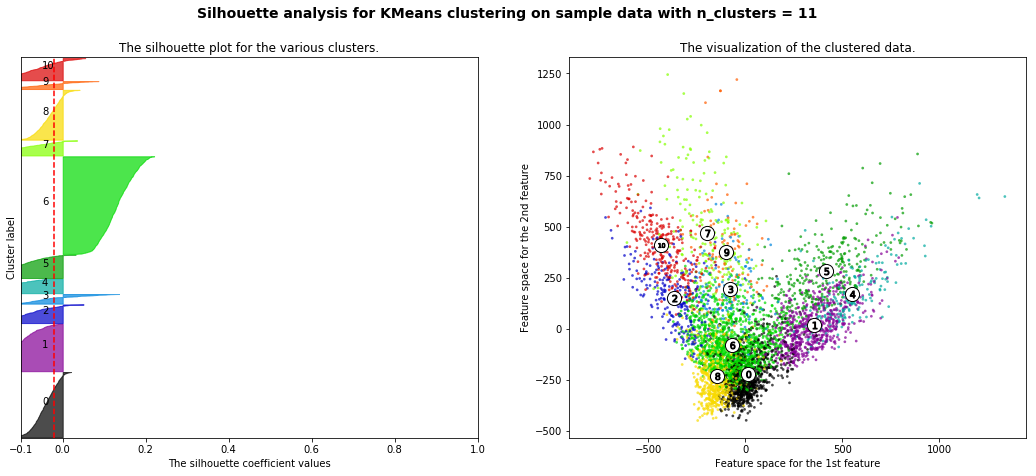

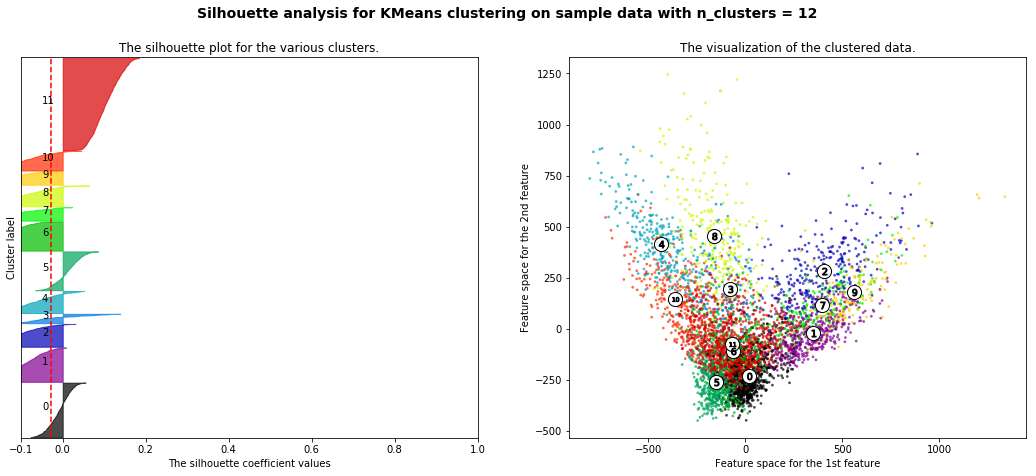

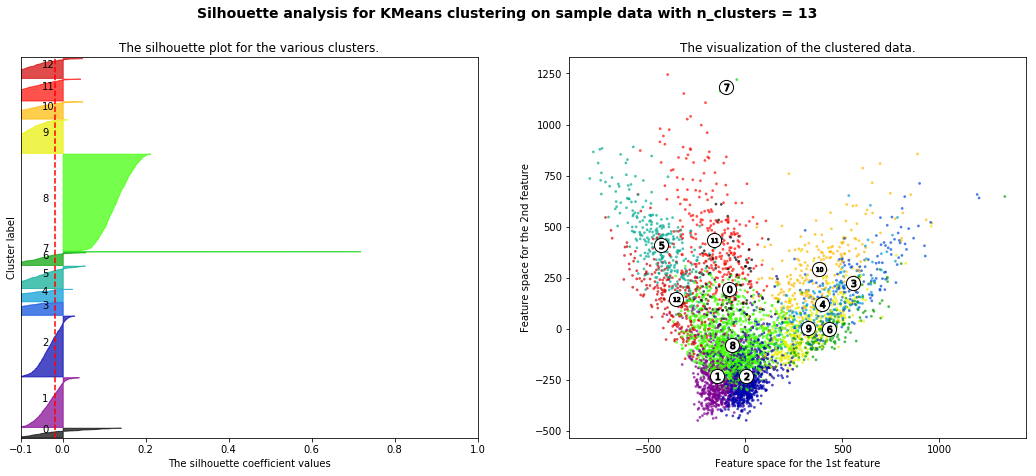

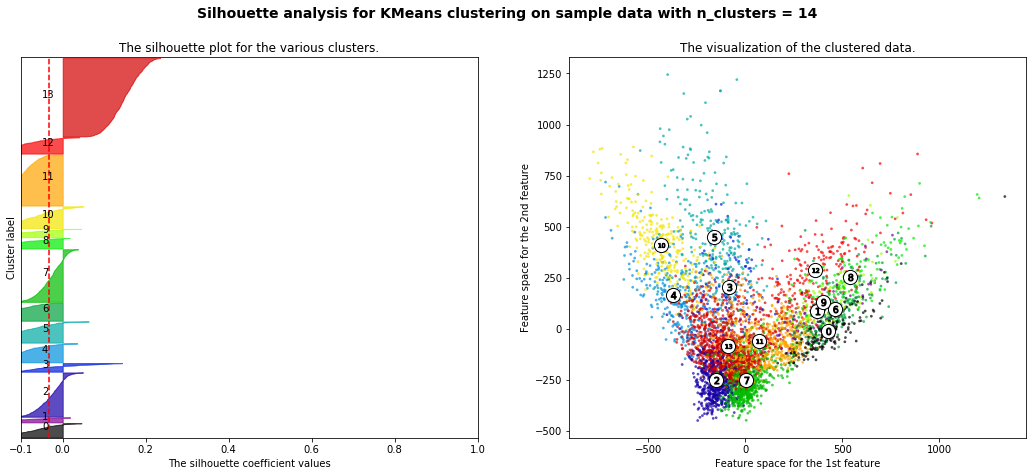

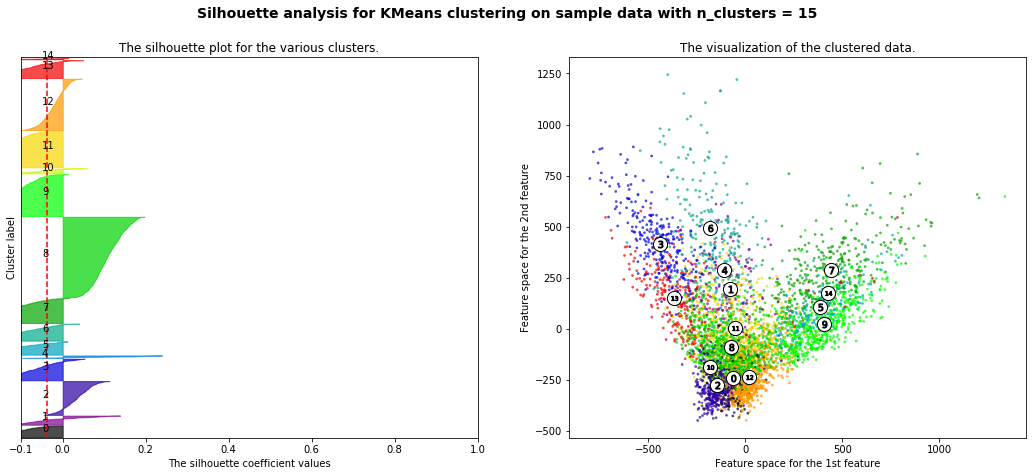

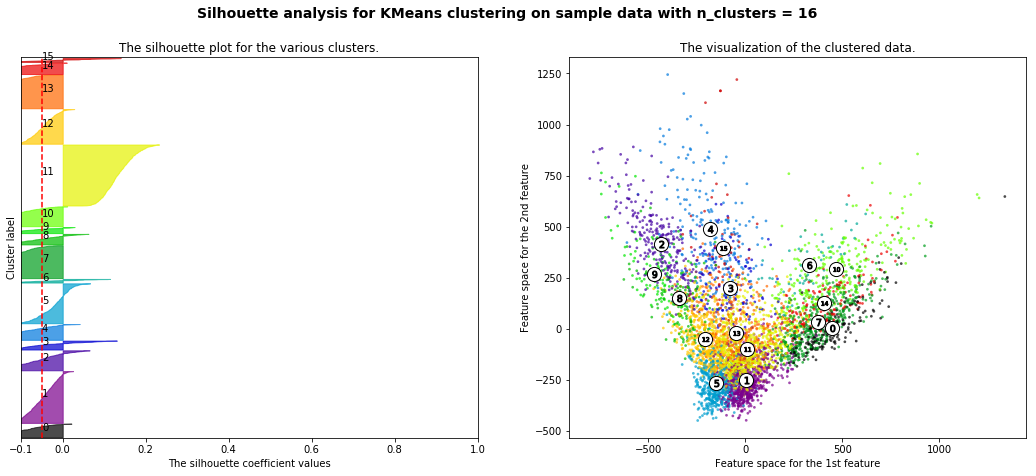

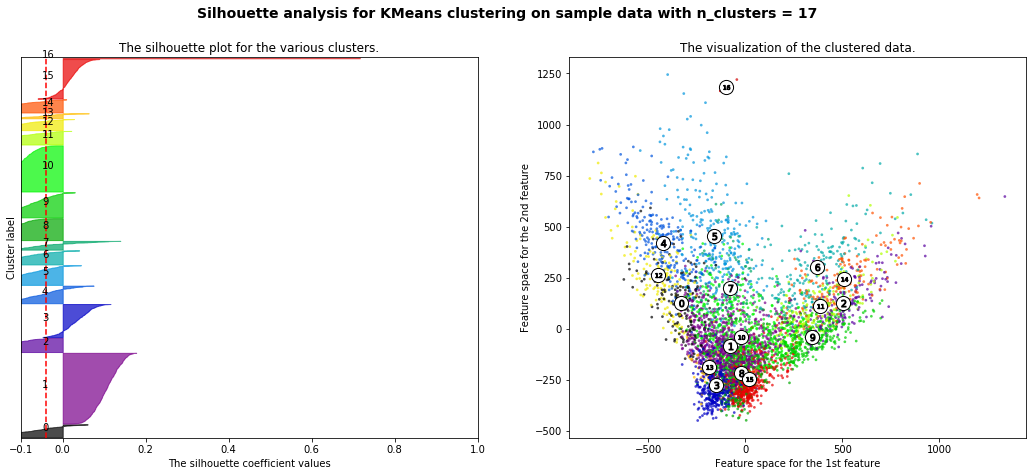

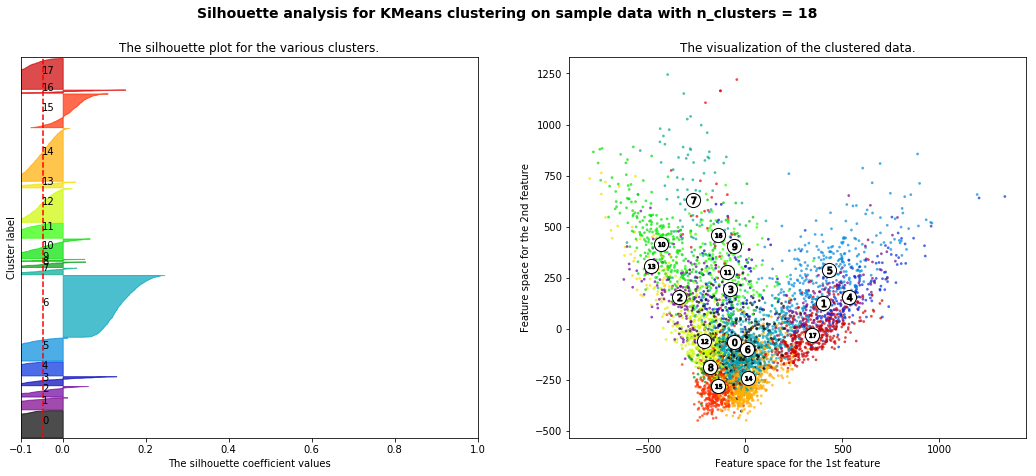

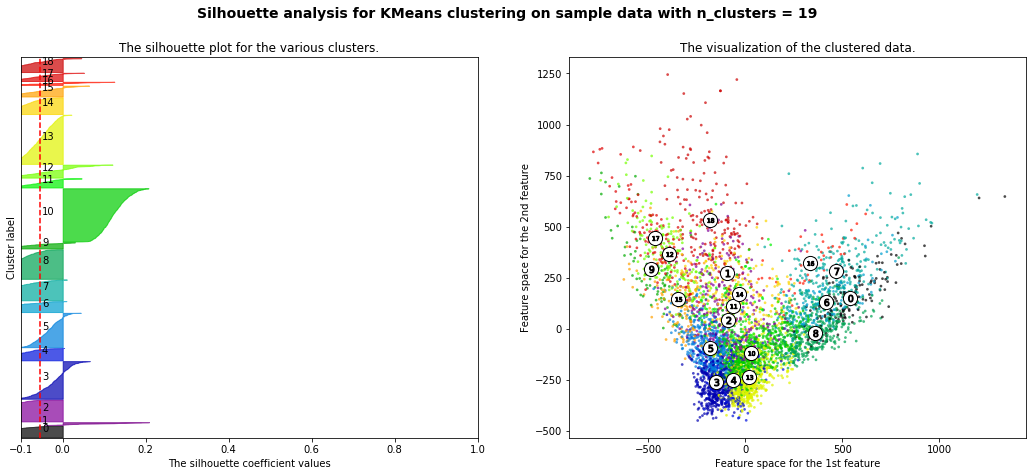

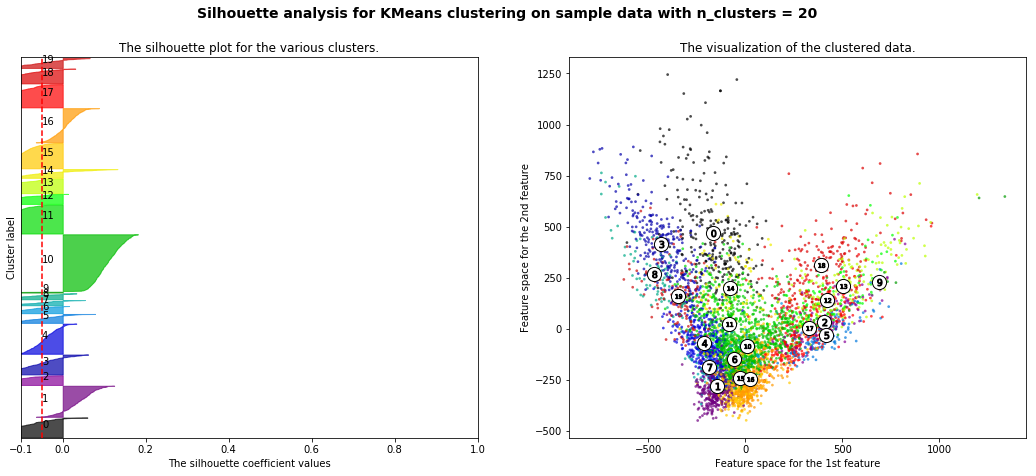

In [21]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [22]:
range_n_clusters = [20, 30, 40, 50]

In [23]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)    

For n_clusters = 20 The average silhouette_score is : -0.050112914
For n_clusters = 30 The average silhouette_score is : -0.041181702
For n_clusters = 40 The average silhouette_score is : -0.052692566
For n_clusters = 50 The average silhouette_score is : -0.068101436


save clustering result to csv

In [24]:
clusters = defaultdict(list)
k = 0
for i in labels:
    clusters[i].append(filelist[k])
    k += 1

In [25]:
with open('raw_result.csv', 'w', newline='') as f:
    w = csv.writer(f, delimiter=',',  quoting=csv.QUOTE_MINIMAL)
    for i in clusters:
        row = []
        row.append('Cluster {}'.format(i+1))
        for j in clusters[i]:
            row.append('\'{}\''.format(j))
        w.writerow(row)